## Методы современной прикладной статистики
###          Дисперсионный анализ

#### 5 апреля 2018г.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import division
import scipy.stats as stats
import math as m
import warnings
import seaborn as sns
warnings.simplefilter('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ns = stats.poisson.rvs(12, size = 60).reshape(12,5)

In [3]:
names = "ABCDEFGHIJKL"
drugnames = map(lambda x: "LS" + x, "ABCFG")

In [4]:
data = []

for name, row in zip("ABCDEFGHIJKL", ns):
    for drug, days, effect in zip("ABCFG", row, [0, 0, 0, 0, 0.35]):
        drugname = "LS" + drug
        for _ in range(days):
            data.append([name, drugname, max(0, (int((10*effect)*np.random.randn(1))+stats.poisson.rvs(10+5*effect, size = 1))[0])])
for _ in data:
    print(_)

['A', 'LSA', 7]
['A', 'LSA', 11]
['A', 'LSA', 10]
['A', 'LSA', 9]
['A', 'LSA', 12]
['A', 'LSA', 7]
['A', 'LSA', 9]
['A', 'LSA', 6]
['A', 'LSA', 5]
['A', 'LSA', 14]
['A', 'LSA', 7]
['A', 'LSA', 8]
['A', 'LSA', 11]
['A', 'LSA', 15]
['A', 'LSA', 10]
['A', 'LSA', 7]
['A', 'LSB', 5]
['A', 'LSB', 12]
['A', 'LSB', 7]
['A', 'LSB', 11]
['A', 'LSB', 12]
['A', 'LSB', 9]
['A', 'LSB', 9]
['A', 'LSB', 9]
['A', 'LSB', 10]
['A', 'LSB', 7]
['A', 'LSB', 10]
['A', 'LSB', 5]
['A', 'LSB', 7]
['A', 'LSC', 12]
['A', 'LSC', 10]
['A', 'LSC', 9]
['A', 'LSC', 8]
['A', 'LSC', 8]
['A', 'LSC', 6]
['A', 'LSC', 9]
['A', 'LSC', 7]
['A', 'LSC', 11]
['A', 'LSF', 4]
['A', 'LSF', 13]
['A', 'LSF', 11]
['A', 'LSF', 12]
['A', 'LSF', 13]
['A', 'LSF', 10]
['A', 'LSF', 10]
['A', 'LSF', 11]
['A', 'LSF', 7]
['A', 'LSF', 11]
['A', 'LSF', 11]
['A', 'LSF', 10]
['A', 'LSF', 13]
['A', 'LSG', 15]
['A', 'LSG', 6]
['A', 'LSG', 19]
['A', 'LSG', 3]
['A', 'LSG', 8]
['A', 'LSG', 13]
['A', 'LSG', 17]
['A', 'LSG', 18]
['A', 'LSG', 13]
['A', 'L

In [5]:
train = pd.DataFrame(data=data, columns = ["Name", "Drug", "Rows"])
train.head()

,Name,Drug,Rows
0,A,LSA,7
1,A,LSA,11
2,A,LSA,10
3,A,LSA,9
4,A,LSA,12


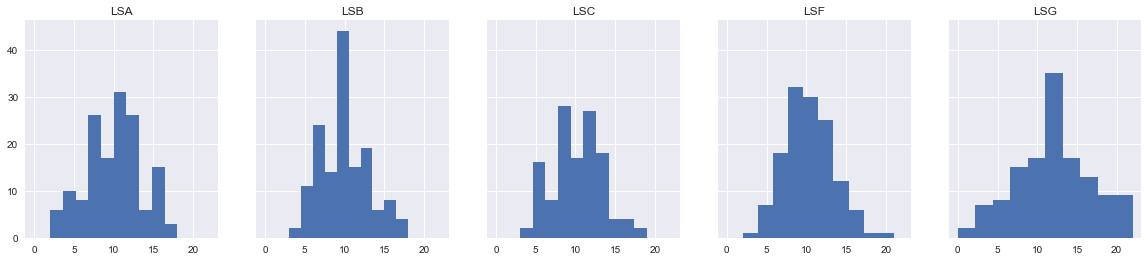

In [6]:
fig, axes = plt.subplots(ncols = 5, figsize = (20, 4), sharey = True, sharex=True)
for _ in range(len(drugnames)):
    axes[_].set_title(drugnames[_])
    axes[_].hist(train[train['Drug'] == drugnames[_]]['Rows'])

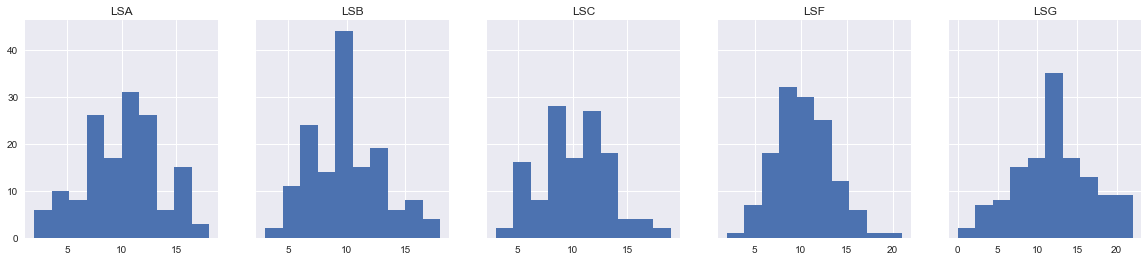

In [7]:
fig, axes = plt.subplots(ncols = 5, figsize = (20, 4), sharey = True)
for _ in range(len(drugnames)):
    axes[_].set_title(drugnames[_])
    axes[_].hist(train[train['Drug'] == drugnames[_]]['Rows'])

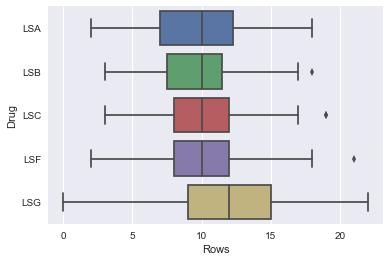

In [8]:
sns.boxplot(y="Drug", x="Rows", data=train, orient="h")

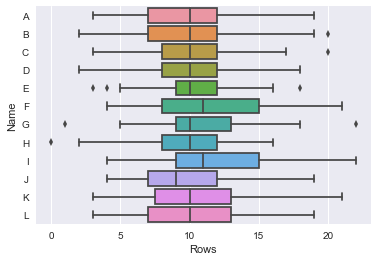

In [9]:
sns.boxplot(y="Name", x="Rows", data=train, orient="h")

### Как исследовать зависимость числа написанных строк от фактора Drug?

In [10]:
train.pivot_table(index = "Drug", columns = "Name", values="Rows", aggfunc=lambda x: " ".join(map(str, x)))

Name,A,B,C,D,E,F,G,H,I,J,K,L
Drug,,,,,,,,,,,,
LSA,7 11 10 9 12 7 9 6 5 14 7 8 11 15 10 7,8 15 15 12 7 11 4 7 9 13 2 9 12 10 6 8,5 11 7 13 8 10 3 8 6 10,10 9 5 11 9 15 9 3 6 16 10,7 13 7 10 10 13 9 13 12 4 11 13 13,15 7 5 10 9 12 4 6 15 4 8 12 15 13 16,10 12 13 15 14 11 18 12 15,8 9 13 11 10 9 2 7 13 11 15,16 9 4 9 11 12 11 14 17 11,9 7 9 12 14 14 9 14 12 6 9 15,11 7 5 10 13 7 8 7 12 12 10 13 15 3 6 6 10 7 8 18,11 3 10 10 7
LSB,5 12 7 11 12 9 9 9 10 7 10 5 7,13 8 12 10 6 7 3 13 12,9 9 7 12 8 9 5 6 3 10 12 5 7,12 7 14 11 9 11 10 11 11 8 8 17 18 13,11 11 13 7 7 11 10 12 12 5 9 5 10 9 8,10 9 10 7 10 8,15 8 7 8 13 10 10 10 14 9 9 8 12 14 10,12 11 7 9 10 12 8 11 7 14 10 16 7 14 11 15 8,15 11 10 7 10 17 12 10 10 6 16 5,14 9 17 16 11 6 9 8 9 6 7 7 9,6 8 16 9 8 11 11 5 6 5 9 13 10 5 10 9,9 10 5 16
LSC,12 10 9 8 8 6 9 7 11,6 14 13 8 7 10 5 12 7 4 11 5 15,13 9 9 5 10 11 12 10 14 12 11 12 14 9 10,9 10 7 11 3 10 12 6 11 10 11 9 8,13 9 8 8 9 11,15 9 16 11 11 12 19 11 19 14 5 5 5,5 13 9 9 11 13 16 8 9,13 11 10 8 11 7 10 14 6 9 14 8,13 11 16 13 15,11 8 10 9 5 7 12 7 12 8 10 6 12 6 17 13 7,10 13 10 10,13 8 10 9 10 6 13 11 6 15
LSF,4 13 11 12 13 10 10 11 7 11 11 10 13,15 9 10 10 11 14 10 7 9,12 9 14 17 9 12 12 13 9 6 10 5,11 15 13 4 9 15 14 11 11 6 2 9 13 15 7,7 9 9 12 14 10 9 11 10,10 12 13 8 21 16 8 9 12 11 15 18 8 9 8 16 12 4,9 7 13 8 8 11 16 8,13 11 12 7 12 8 6 9 9 10 12 11,9 9 7 17 10 13 15 8 7 13 9,7 11 13 9 7 10 15 7 10,5 4 9 11 12 14 13,10 6 16 6 7 8 8 4 8 7
LSG,15 6 19 3 8 13 17 18 13 13 13,8 9 4 19 12 20 18 6 16 11 11,10 16 11 15 12 14 17 20,11 8 9 8 17 13 6 4,14 16 11 12 12 3 18 11,17 12 6 8 20 17 15 10 7 6 11 21 9 17 10 13,22 13 7 13 9 12 10 1 10 9,6 8 10 7 11 12 0 15 13 14 7 9,15 10 7 4 13 21 18 8 9 14 22 16 8 9 14,4 4 14 7 19 12,13 14 9 20 15 15 13 12 16 21 10 16,14 8 18 19 14 11 13 17 11 5 5 15 12 13 11


#### Способ 1:

Перейти к средним:

In [11]:
pivot = train.pivot_table(index = "Name", columns = "Drug", values="Rows", aggfunc=lambda x: x.mean())
pivot

Drug,LSA,LSB,LSC,LSF,LSG
Name,,,,,
A,9.250000,8.692308,8.888889,10.461538,12.545455
B,9.250000,9.333333,9.000000,10.555556,12.181818
C,8.100000,7.846154,10.733333,10.666667,14.375000
D,9.363636,11.428571,9.000000,10.333333,9.500000
E,10.384615,9.333333,9.666667,10.111111,12.125000
F,10.066667,9.000000,11.692308,11.666667,12.437500
G,13.333333,10.466667,10.333333,10.000000,10.600000
H,9.818182,10.705882,10.083333,10.000000,9.333333
I,11.400000,10.750000,13.600000,10.636364,12.533333


In [12]:
stats.f_oneway(pivot.values[:,0], pivot.values[:,1], pivot.values[:,2], pivot.values[:,3], pivot.values[:,4])

F_onewayResult(statistic=5.188362262331919, pvalue=0.0012810197878809053)

#### Способ 2:
Проверить, значим ли фактор человека, а затем объединить выборки.

In [13]:
stats.bartlett(*[train[train['Name'] == name]['Rows'].values for name in names])

BartlettResult(statistic=18.06310401006389, pvalue=0.08012788016743282)

In [14]:
stats.f_oneway(*[train[train['Name'] == name]['Rows'].values for name in names])

F_onewayResult(statistic=1.3878297073875856, pvalue=0.17368793850893383)

Проверим выборки на нормальность:

In [15]:
for sample in [train[train['Drug'] == name]['Rows'].values for name in drugnames]:
    print(stats.normaltest(sample))

NormaltestResult(statistic=2.5392112744248165, pvalue=0.2809423931602079)
NormaltestResult(statistic=3.9823534130091853, pvalue=0.13653466964899877)
NormaltestResult(statistic=1.7113585296421103, pvalue=0.4249944092623552)
NormaltestResult(statistic=2.1458027898657663, pvalue=0.3420147565877827)
NormaltestResult(statistic=1.3394410644175643, pvalue=0.51185160383718)


Проверка на равенство дисперсий:

In [16]:
stats.bartlett(*[train[train['Drug'] == name]['Rows'].values for name in drugnames])

BartlettResult(statistic=37.23247591004375, pvalue=1.6131929055803887e-07)

Проверяем с помощью критерия Фишера:

In [17]:
stats.f_oneway(*[train[train['Drug'] == name]['Rows'].values for name in drugnames])

F_onewayResult(statistic=8.831566977968643, pvalue=5.909682980508074e-07)

In [18]:
ind = train.groupby('Drug')['Rows'].mean().sort_values().index

In [19]:
ssamples = [train[train['Drug'] == name]['Rows'].values for name in ind]
alpha = 0.05
k = 5
for j in range(k-1):
    nj = len(ssamples[j])
    njj = len(ssamples[j + 1])
    LSD = stats.t.ppf(1-alpha*0.5, nj + njj - 2) * m.sqrt((nj + njj)/(nj*njj))*m.sqrt(((nj - 1)*ssamples[j].var(ddof=False) + (njj - 1)*ssamples[j+1].var(ddof=False))/(nj + njj - 2))
    print("Diff = {}, LSD = {}".format(abs(ssamples[j].mean() - ssamples[j+1].mean()), LSD))

Diff = 0.1842710057, LSD = 0.756328471722
Diff = 0.175139425139, LSD = 0.796729354698
Diff = 0.205931495405, LSD = 0.781256559201
Diff = 1.71434267487, LSD = 0.980861939566


In [20]:
train.groupby('Drug')['Rows'].mean().sort_values()

Drug
LSB     9.727891
LSA     9.912162
LSC    10.087302
LSF    10.293233
LSG    12.007576
Name: Rows, dtype: float64

In [21]:
def sheffe(c, samples):
    ns = np.array(map(lambda x: len(x), samples))
    k = len(samples)
    n = np.array(ns).sum()
    sin = 1./(n - k)*(ns* np.array(map(lambda x: x.var(), samples))).sum()
    S = (c * np.array(map(lambda x: x.mean(), samples))).sum()**2/((k - 1) * sin * (c**2/ns).sum())
    return S

In [22]:
for i in range(5):
    for j in range(i+1, 5):
        c = np.zeros(5)
        c[i] = 1
        c[j] = -1
        print("sheffe for {} and {} is {}".format(i, j, sheffe(c, ssamples)))

sheffe for 0 and 1 is 0.048461343189
sheffe for 0 and 2 is 0.169602007229
sheffe for 0 and 3 is 0.431874670916
sheffe for 0 and 4 is 6.99456958032
sheffe for 1 and 2 is 0.0403993091284
sheffe for 1 and 3 is 0.196853461305
sheffe for 1 and 4 is 5.92845504218
sheffe for 2 and 3 is 0.0530997368984
sheffe for 2 and 4 is 4.60018875082
sheffe for 3 and 4 is 3.76790002717


In [23]:
stats.f.ppf(0.95, 4, 5000)

2.3737090386202215